#### Grodzditskaya Victoria

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [3]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Каждая колонка заполнена более чем на 88% (не менее 350 заполненных ячеек из 395). Соответственно, все характеристики можно использовать в анализе. 

In [42]:
pd.DataFrame(students.sex.value_counts())

,sex
F,177
M,152


In [5]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


In [61]:
pd.DataFrame(students.address.value_counts())

,address
U,247
R,70


In [62]:
pd.DataFrame(students.famsize.value_counts())

,famsize
GT3,221
LE3,87


In [63]:
pd.DataFrame(students.Pstatus.value_counts())

,Pstatus
T,263
A,27


In [64]:
pd.DataFrame(students.Mjob.value_counts())

,Mjob
other,112
services,77
at_home,51
teacher,43
health,29


In [65]:
pd.DataFrame(students.Fjob.value_counts())

,Fjob
other,171
services,83
teacher,23
at_home,14
health,10


In [66]:
pd.DataFrame(students.reason.value_counts())

,reason
course,109
reputation,88
home,88
other,30


In [67]:
pd.DataFrame(students.guardian.value_counts())

,guardian
mother,207
father,70
other,24


count    329.000000
mean      16.705167
std        1.278816
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

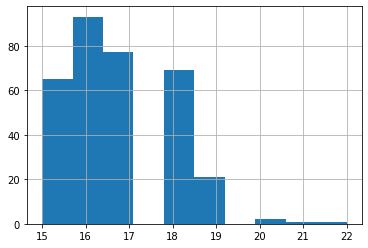

In [68]:
students.age.hist()
students.age.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

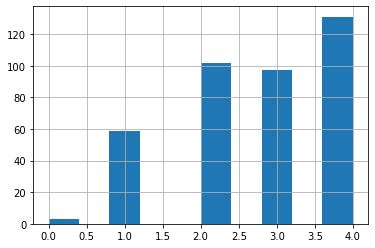

In [7]:
students.Medu.hist()
students.Medu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

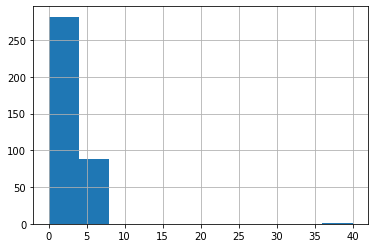

In [8]:
students.Fedu.hist()
students.Fedu.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

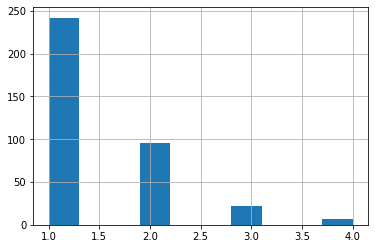

In [9]:
students.traveltime.hist()
students.traveltime.describe()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

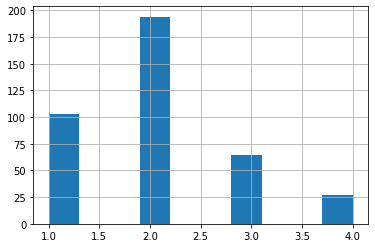

In [10]:
students.studytime.hist()
students.studytime.describe()

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

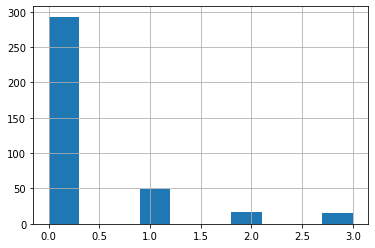

In [11]:
students.failures.hist()
students.failures.describe()

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

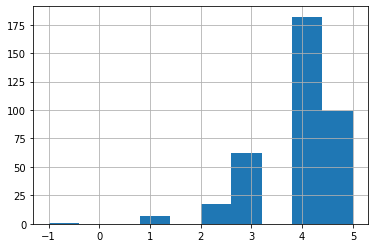

In [12]:
students.famrel.hist()
students.famrel.describe()

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

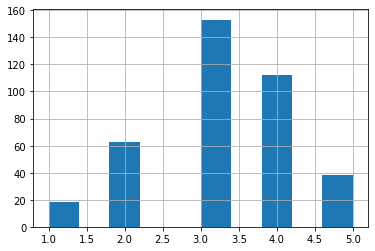

In [13]:
students.freetime.hist()
students.freetime.describe()

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

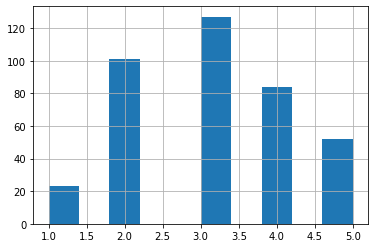

In [14]:
students.goout.hist()
students.goout.describe()

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

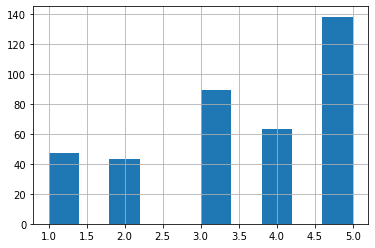

In [15]:
students.health.hist()
students.health.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

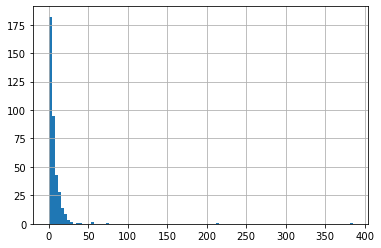

In [16]:
students.absences.hist(bins=100)
students.absences.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

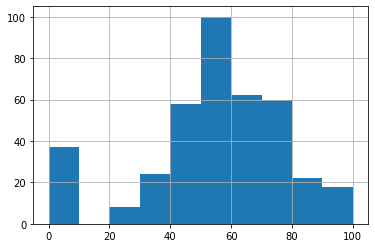

In [17]:
students.score.hist()
students.score.describe()

### Очистим данные от выбросов

In [18]:
# граница выброса определена заданным условием
students = students.loc[students.Fedu <= 4]

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

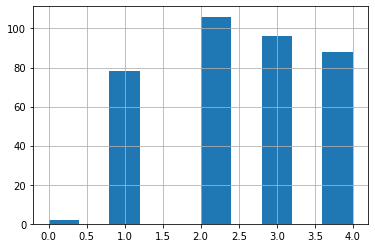

In [19]:
students.Fedu.hist()
students.Fedu.describe()

In [20]:
# граница выброса определена заданным условием
students = students.loc[students.famrel >= 1]

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

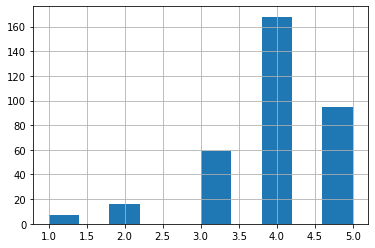

In [21]:
students.famrel.hist()
students.famrel.describe()

In [22]:
# выбор границы выбросов сделан на основании здравого смысла:)
students = students.loc[students.absences < 50]

count    329.000000
mean       5.255319
std        6.288431
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64

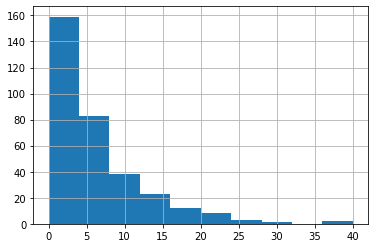

In [23]:
students.absences.hist()
students.absences.describe()

### Представим булевы переменные в числовом виде

In [24]:
def convert_to_boolean(x): return 0 if x == 'no' else 1


students.schoolsup = students.schoolsup.apply(convert_to_boolean)
students.schoolsup

0      1
1      0
2      1
3      0
4      0
      ..
389    0
391    0
392    1
393    0
394    1
Name: schoolsup, Length: 329, dtype: int64

In [25]:
students.famsup = students.famsup.apply(convert_to_boolean)
students.famsup

0      0
1      1
2      0
3      1
4      1
      ..
389    0
391    0
392    0
393    0
394    0
Name: famsup, Length: 329, dtype: int64

In [26]:
students.paid = students.paid.apply(convert_to_boolean)
students.paid

0      0
1      0
2      1
3      1
4      1
      ..
389    0
391    0
392    0
393    0
394    0
Name: paid, Length: 329, dtype: int64

In [27]:
students.activities = students.activities.apply(convert_to_boolean)
students.activities

0      0
1      0
2      0
3      1
4      0
      ..
389    1
391    0
392    0
393    1
394    0
Name: activities, Length: 329, dtype: int64

In [28]:
students.nursery = students.nursery.apply(convert_to_boolean)
students.nursery

0      1
1      0
2      1
3      1
4      1
      ..
389    1
391    0
392    0
393    0
394    1
Name: nursery, Length: 329, dtype: int64

In [29]:
students.higher = students.higher.apply(convert_to_boolean)
students.higher

0      1
1      1
2      1
3      1
4      1
      ..
389    1
391    1
392    1
393    1
394    1
Name: higher, Length: 329, dtype: int64

In [30]:
students.internet = students.internet.apply(convert_to_boolean)
students.internet

0      1
1      1
2      1
3      1
4      0
      ..
389    1
391    1
392    0
393    1
394    1
Name: internet, Length: 329, dtype: int64

In [31]:
students.romantic = students.romantic.apply(convert_to_boolean)
students.romantic

0      0
1      0
2      1
3      1
4      0
      ..
389    0
391    0
392    0
393    0
394    0
Name: romantic, Length: 329, dtype: int64

### Рассмотрим, какие факторы коррелируют с целевой переменной

In [32]:
correlation = students.corr()
display(correlation)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.156119,-0.167994,0.071092,-0.019264,0.223304,-0.213899,-0.142895,-0.072550,-0.123919,-0.097838,0.019264,-0.198817,-0.076535,0.071963,0.052471,0.011412,0.081094,-0.068777,0.184163,-0.140221
Medu,-0.156119,1.000000,0.649222,-0.182925,0.079209,-0.227180,-0.029757,0.185058,0.151528,0.087631,0.156371,-0.079209,0.157997,0.212415,0.043073,-0.038449,-0.007760,0.065208,-0.086507,0.132686,0.196835
Fedu,-0.167994,0.649222,1.000000,-0.188914,-0.005429,-0.258676,0.060265,0.177247,0.090545,0.098738,0.127216,0.005429,0.167722,0.154214,0.025217,-0.043031,-0.030394,0.018743,0.009003,0.061455,0.115471
traveltime,0.071092,-0.182925,-0.188914,1.000000,-0.121020,0.077731,-0.016226,0.048456,-0.009928,0.007024,-0.058690,0.121020,-0.082964,-0.054437,-0.003671,-0.053650,0.007549,0.015018,-0.019926,-0.027909,-0.067086
studytime,-0.019264,0.079209,-0.005429,-0.121020,1.000000,-0.138974,-0.026847,0.090154,0.127445,0.103554,0.056214,-1.000000,0.146876,0.037057,0.042888,0.022123,-0.130023,-0.060072,-0.091456,-0.063095,0.112451
failures,0.223304,-0.227180,-0.258676,0.077731,-0.138974,1.000000,0.004349,-0.083098,-0.158542,-0.064842,-0.067102,0.138974,-0.239886,-0.073661,0.055779,0.023639,0.114502,0.094690,0.053909,0.114651,-0.309799
schoolsup,-0.213899,-0.029757,0.060265,-0.016226,-0.026847,0.004349,1.000000,0.051780,-0.027436,0.062876,0.064071,0.026847,0.051938,-0.084499,-0.042597,-0.026975,-0.074775,-0.011265,-0.042419,0.007058,-0.086954
famsup,-0.142895,0.185058,0.177247,0.048456,0.090154,-0.083098,0.051780,1.000000,0.267516,-0.050151,0.052672,-0.090154,0.049219,0.060977,-0.014184,-0.007179,0.044228,-0.032035,-0.013627,0.045549,-0.026581
paid,-0.072550,0.151528,0.090545,-0.009928,0.127445,-0.158542,-0.027436,0.267516,1.000000,0.009918,0.083478,-0.127445,0.127832,0.121717,0.062010,-0.014205,-0.107628,-0.001557,-0.110847,-0.002287,0.098234
activities,-0.123919,0.087631,0.098738,0.007024,0.103554,-0.064842,0.062876,-0.050151,0.009918,1.000000,-0.034883,-0.103554,0.055080,0.064389,-0.053775,0.036202,0.090614,0.060540,-0.024497,-0.097112,0.011831


<AxesSubplot:>

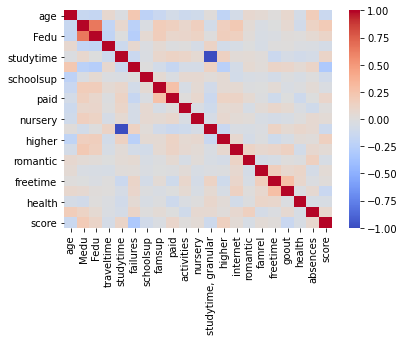

In [33]:
sns.heatmap(correlation, cmap='coolwarm')

Как видим из таблицы и графика, нет сильно кррелирующих друг с другом переменных (самые коррелирующие переменные Fedu и Medu - 0.649222 оставим), поэтому все характеристики для анализа важны. 

In [44]:
score = correlation.loc['score']
sorted_score = score.sort_values(ascending=False)
display(sorted_score)

score                  1.000000
Medu                   0.196835
higher                 0.149100
Fedu                   0.115471
studytime              0.112451
paid                   0.098234
absences               0.081455
famrel                 0.046369
nursery                0.041226
internet               0.040464
freetime               0.016346
activities             0.011831
famsup                -0.026581
health                -0.044726
romantic              -0.048305
traveltime            -0.067086
schoolsup             -0.086954
studytime, granular   -0.112451
age                   -0.140221
goout                 -0.142412
failures              -0.309799
Name: score, dtype: float64

### Рассмотрим распределение исследуемого признака по номинативным категориям

<AxesSubplot:xlabel='school', ylabel='score'>

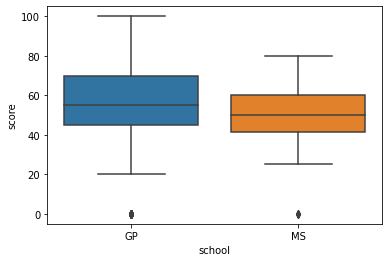

In [35]:
sns.boxplot(x='school', y='score', data=students)

<AxesSubplot:xlabel='famsize', ylabel='score'>

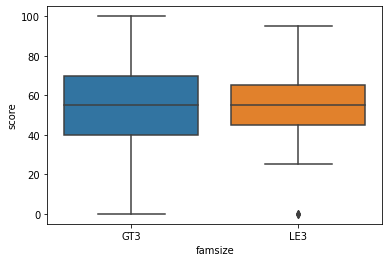

In [36]:
sns.boxplot(x='famsize', y='score', data=students)

<AxesSubplot:xlabel='Pstatus', ylabel='score'>

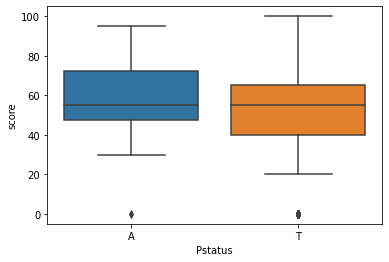

In [37]:
sns.boxplot(x='Pstatus', y='score', data=students)

<AxesSubplot:xlabel='Mjob', ylabel='score'>

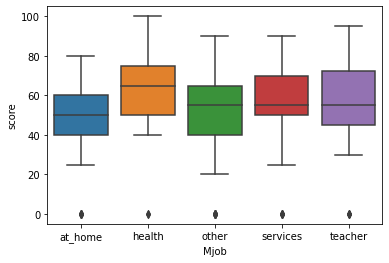

In [38]:
sns.boxplot(x='Mjob', y='score', data=students)

<AxesSubplot:xlabel='Fjob', ylabel='score'>

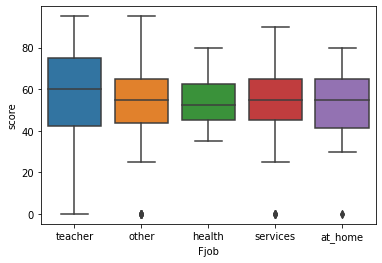

In [39]:
sns.boxplot(x='Fjob', y='score', data=students)

<AxesSubplot:xlabel='reason', ylabel='score'>

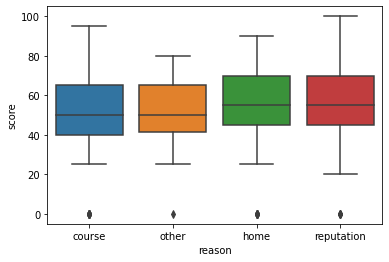

In [40]:
sns.boxplot(x='reason', y='score', data=students)

<AxesSubplot:xlabel='guardian', ylabel='score'>

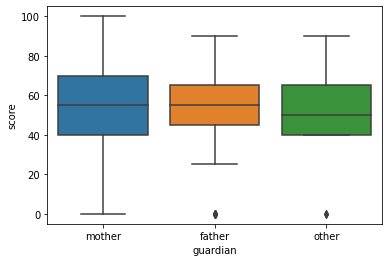

In [41]:
sns.boxplot(x='guardian', y='score', data=students)

In [59]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [60]:
for col in ['school', 'famsize', 'Pstatus', 'Mjob', 'Fjob']:
    get_stat_dif(col)

По итогам теста Стьюдента статистически значимых различий для номинативных переменных не найдено. 

### Выводы

В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

1. В данных достаточно мало пустых значений, поэтому можно учитывать в анализе все факторы.
2. Выбросы найдены ы минимальном количестве. Только в столбцах absences, famrel и Fedu, что позволяет сделать вывод о том, что данные достаточно чистые.
3. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Medu, higher, Fedu, studytime и paid.
